Importing the Necessary Dependencies

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense,LSTM

%matplotlib inline  
#(a magic command to plot the matplotlib within the notebook)
#only incase user is using jupyter notebooks for editing --|^

from datetime import datetime

In [6]:
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)

In [3]:
stock = 'GOOG'
google_data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-11,4.212461,4.576596,4.173606,4.558414,4.547247,601666773
2004-11-12,4.613458,4.727281,4.418439,4.533009,4.521904,672354740
2004-11-15,4.494404,4.690419,4.452063,4.604491,4.593211,477844390
2004-11-16,4.420929,4.469995,4.254802,4.297392,4.286864,839832142
2004-11-17,4.209721,4.420929,4.209223,4.296396,4.285870,728034662


In [7]:
google_data.shape

(5033, 6)

In [8]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,47.461865,47.960455,46.987785,47.480642,47.370387,1.114433e+08
std,45.333796,45.829546,44.888274,45.358509,45.263716,1.444145e+08
min,4.096396,4.221676,4.017691,4.112087,4.102013,1.584340e+05
25%,13.262788,13.378604,13.100895,13.237134,13.204705,2.672400e+07
50%,27.770908,27.907894,27.524830,27.740339,27.672380,5.214200e+07
75%,62.277000,62.944500,61.817951,62.326000,62.173313,1.358152e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-11-11 to 2024-11-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5033 non-null   float64
 1   High       5033 non-null   float64
 2   Low        5033 non-null   float64
 3   Close      5033 non-null   float64
 4   Adj Close  5033 non-null   float64
 5   Volume     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [10]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Text(0.5, 1.0, 'Closing Price of Google Data')

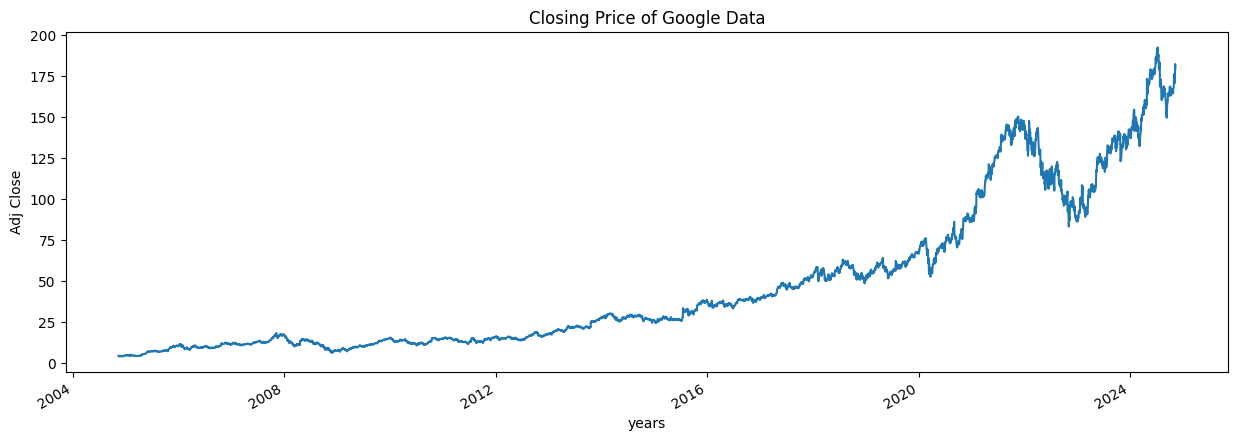

In [11]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google Data")

In [12]:
def plot_graph(figsize,values,column_name):
  plt.figure()
  values.plot(figsize=figsize)
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Google data")

In [13]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

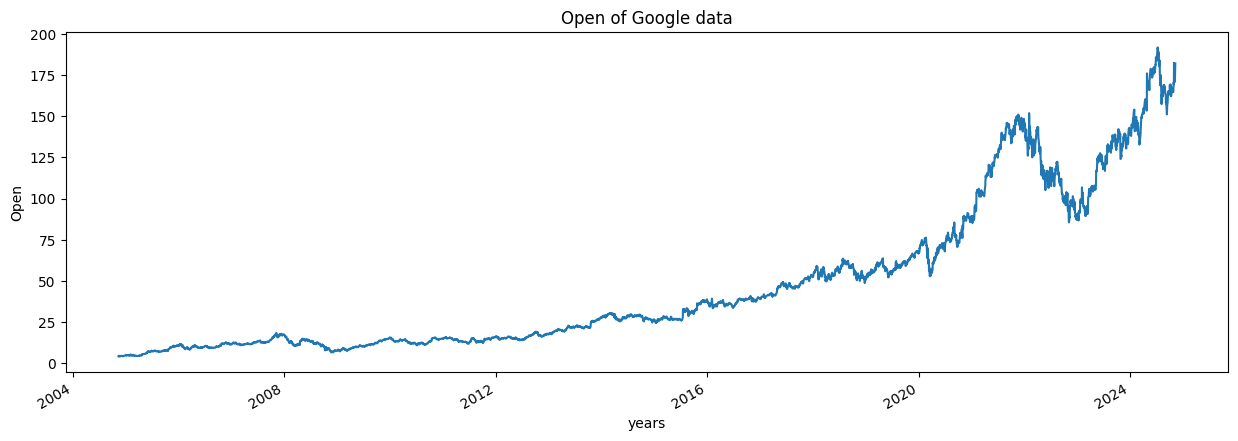

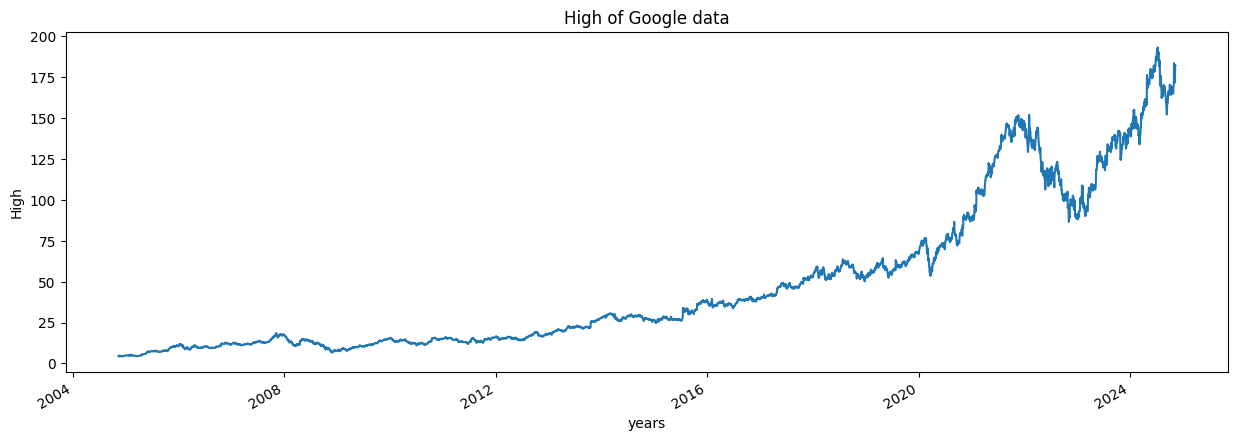

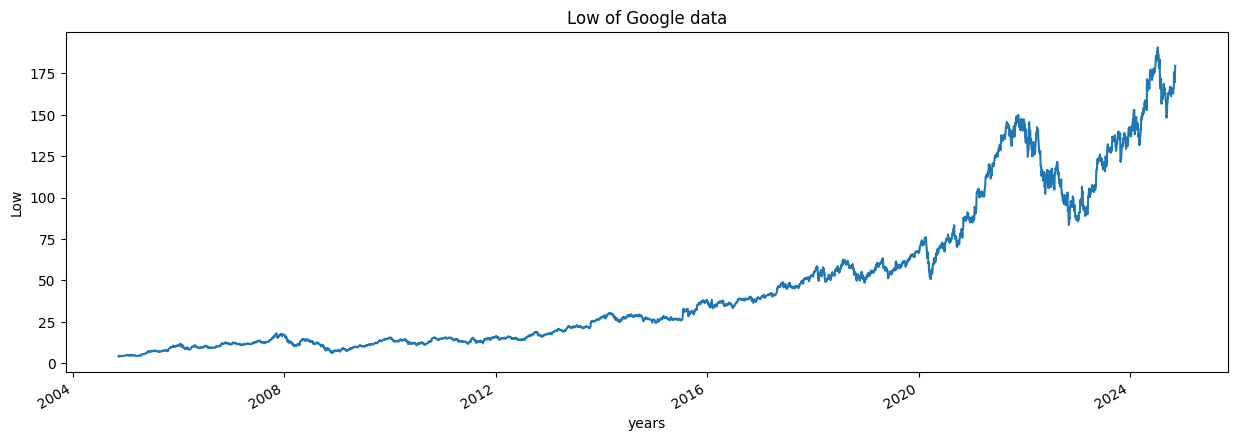

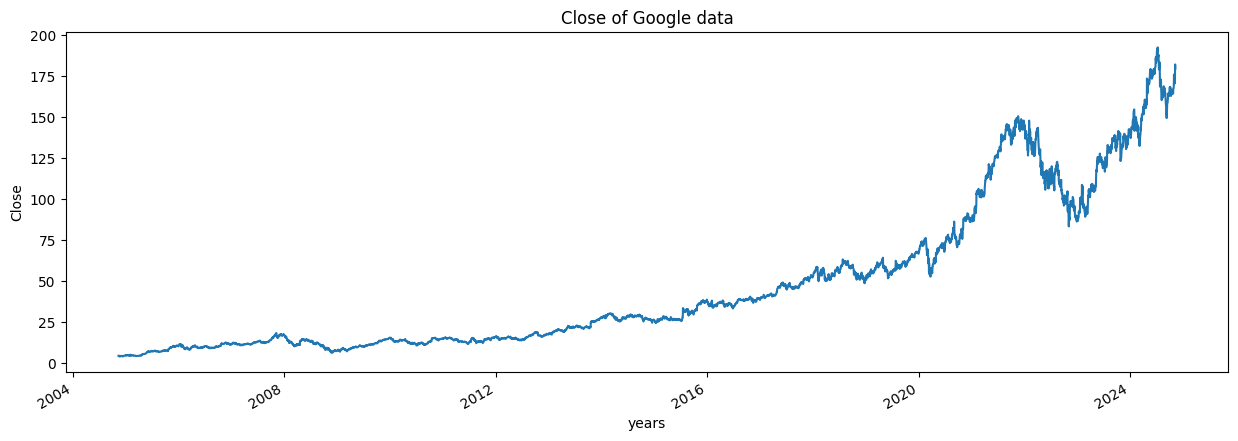

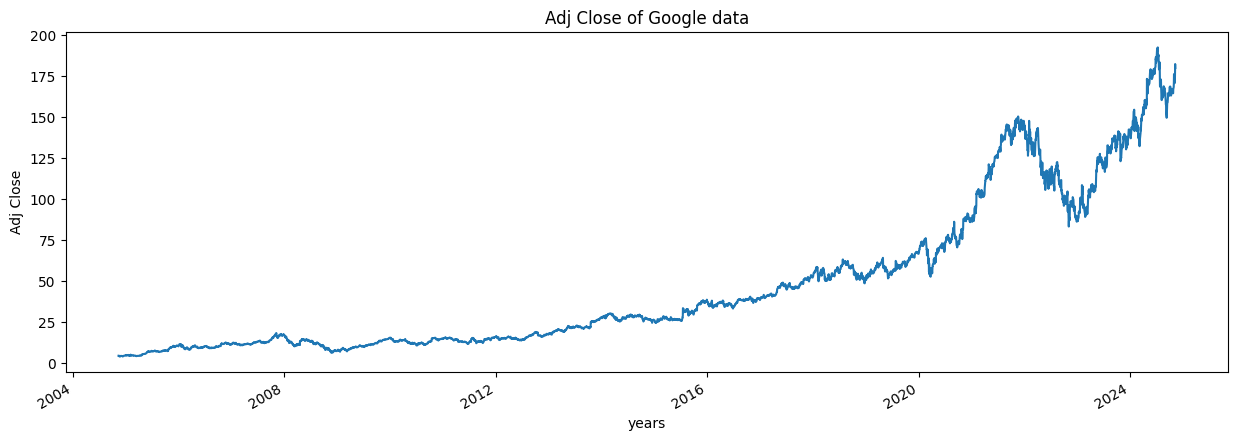

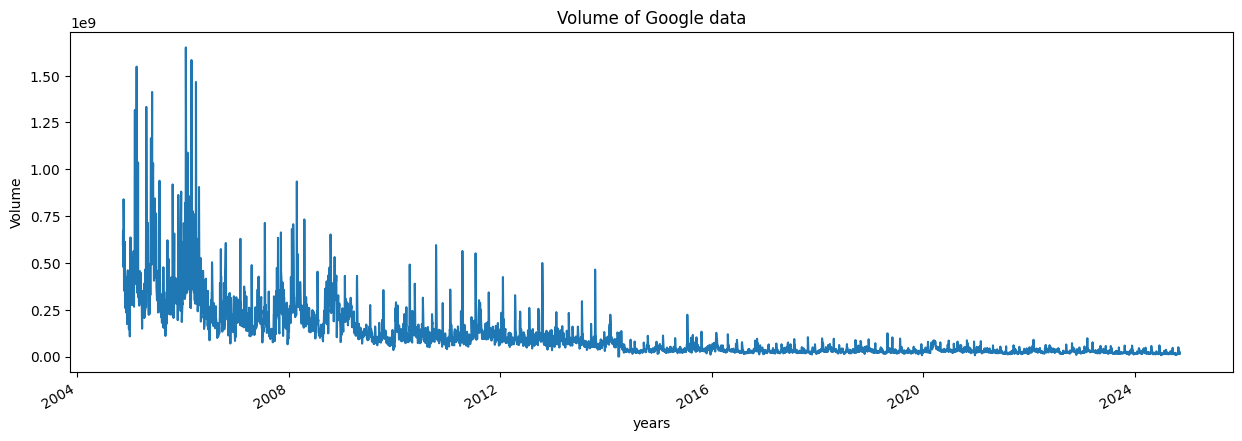

In [14]:
for column in google_data.columns:
  plot_graph((15,5),google_data[column],column)

In [15]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [16]:
temp_data=[10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)

40.0


In [17]:
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [18]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [19]:
for i in range(2004,2025):
  print(i,list(google_data.index.year).count(i))

2004 35
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 217


In [20]:
google_data['MA_for_250_days']=google_data['Adj Close'].rolling(250).mean()

In [21]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-11-01         NaN
2005-11-02         NaN
2005-11-03         NaN
2005-11-04         NaN
2005-11-07    6.064971
Name: MA_for_250_days, dtype: float64

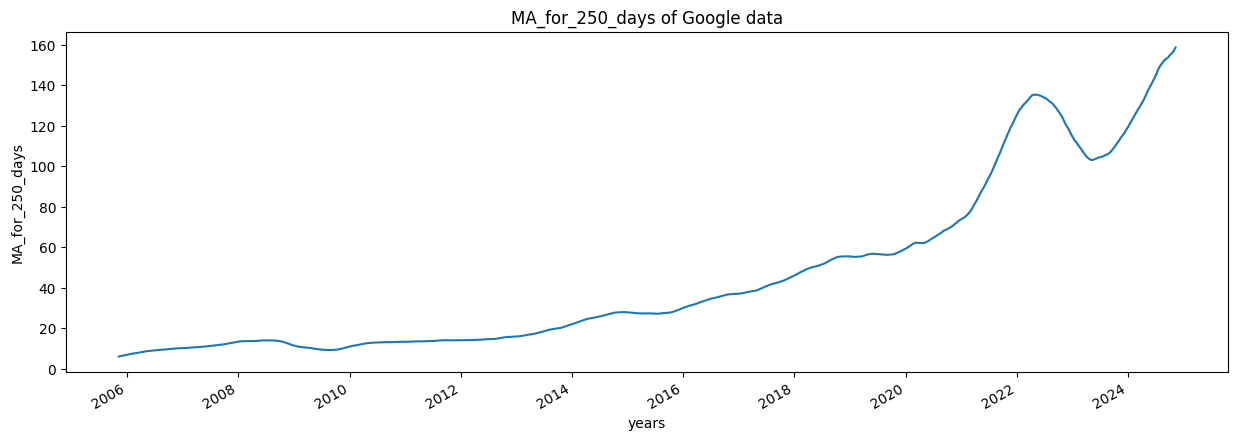

In [22]:
plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

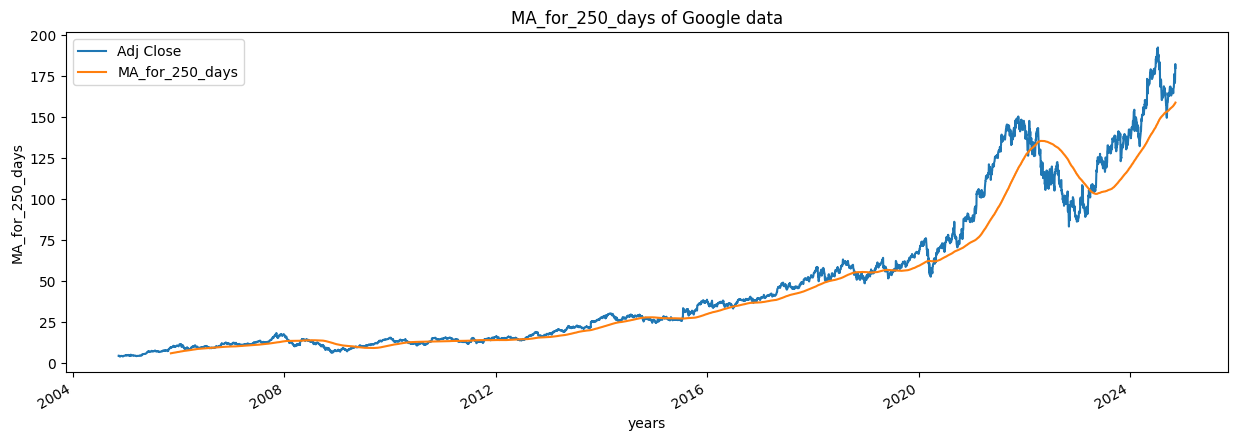

In [23]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

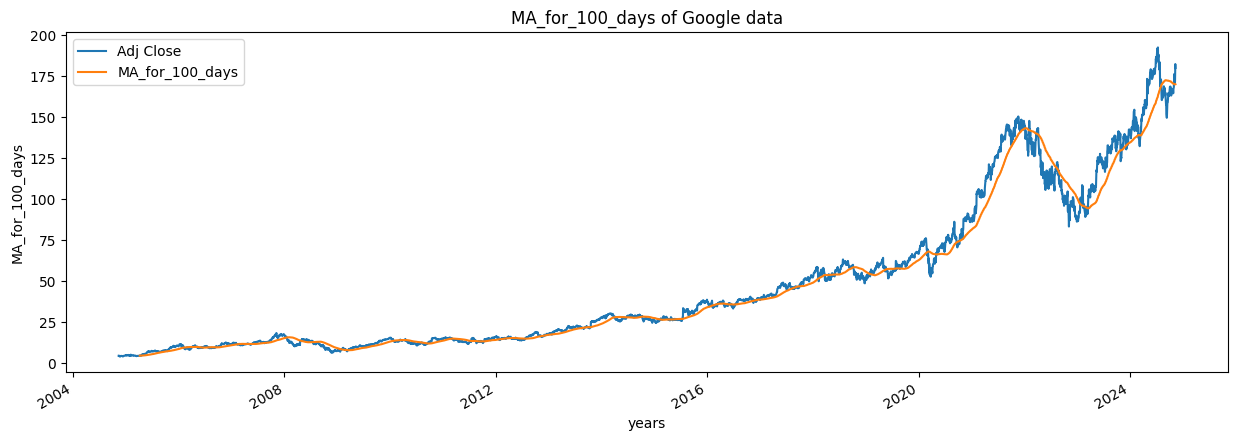

In [24]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

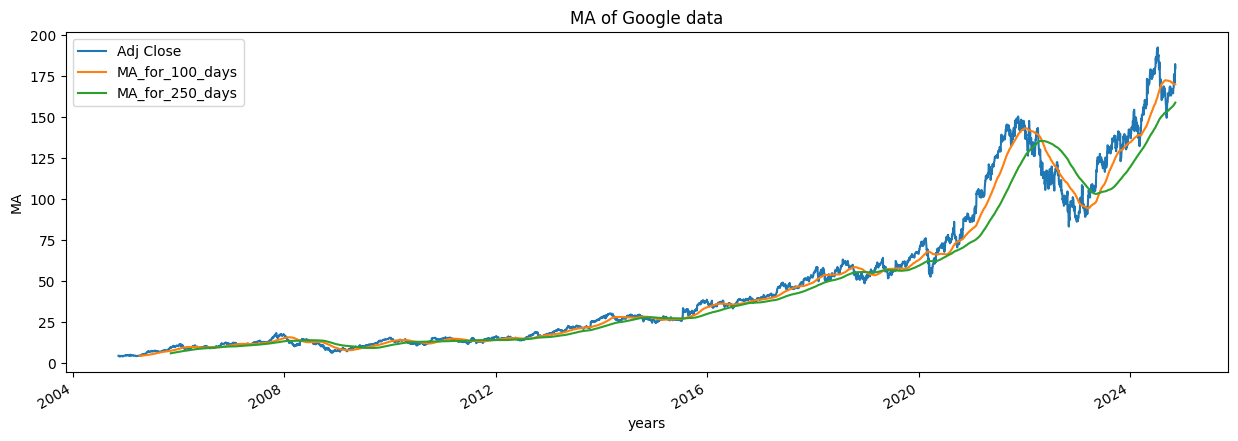

In [25]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']],'MA')

In [26]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-11-11,4.547247,NaN
2004-11-12,4.521904,-0.005573
2004-11-15,4.593211,0.015769
2004-11-16,4.286864,-0.066696
2004-11-17,4.285870,-0.000232


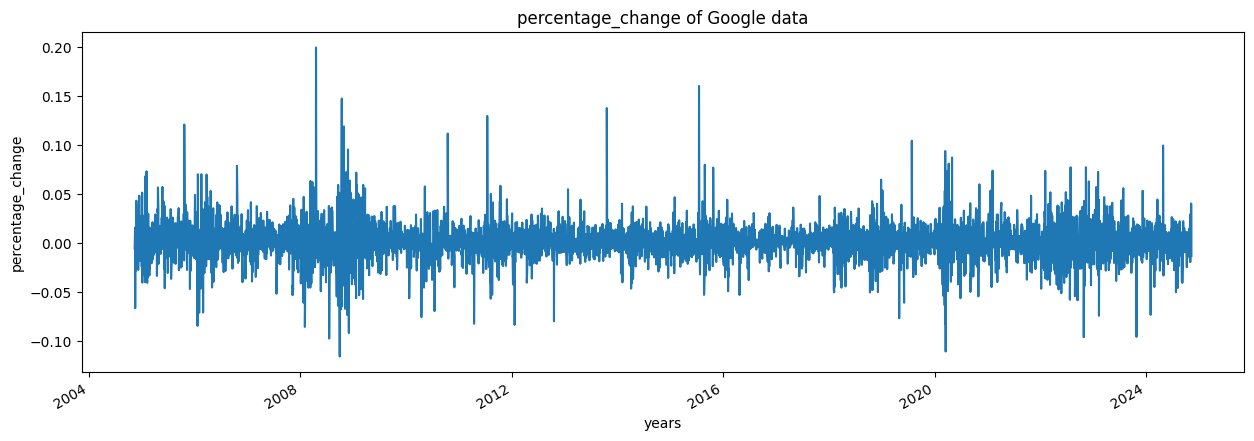

In [27]:
plot_graph((15,5),google_data['percentage_change_cp'],'percentage_change')

In [28]:
Adj_close_price = google_data[['Adj Close']]
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([4.10201311]))

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00236443],
       [0.00222985],
       [0.00260853],
       ...,
       [0.92524499],
       [0.94622161],
       [0.93337011]])

In [30]:
len(scaled_data)

5033

In [31]:
x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

x_data,y_data = np.array(x_data),np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[0.00236443],
        [0.00222985],
        [0.00260853],
        [0.00098166],
        [0.00097638],
        [0.00032194],
        [0.00056736],
        [0.        ],
        [0.0003193 ],
        [0.00127457],
        [0.00188548],
        [0.0021045 ],
        [0.00222721],
        [0.00196069],
        [0.0018868 ],
        [0.00201874],
        [0.00147645],
        [0.0008352 ],
        [0.00064388],
        [0.00109909],
        [0.00086423],
        [0.0007059 ],
        [0.00179312],
        [0.00193693],
        [0.0015002 ],
        [0.00197651],
        [0.00262832],
        [0.00246075],
        [0.00279721],
        [0.00300831],
        [0.00353741],
        [0.00364957],
        [0.00366804],
        [0.00428817],
        [0.00365352],
        [0.00496241],
        [0.00387914],
        [0.00374852],
        [0.00309408],
        [0.00379338],
        [0.00395304],
        [0.00375248],
        [0.00399526],
        [0.00398866],
        [0.00460088],
        [0

In [33]:
int(len(x_data)*0.7)

3453

In [34]:
2596-100-int(len(x_data)*0.7)

-957

In [35]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [36]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\subha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [38]:
model.fit(x_train,y_train,batch_size = 1,epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 123s 35ms/step - loss: 2.5487e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 118s 34ms/step - loss: 5.9450e-05


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [40]:
predictions = model.predict(x_test)
predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


array([[0.24943316],
       [0.24601169],
       [0.25174874],
       ...,
       [0.84505385],
       [0.86073756],
       [0.88002956]], dtype=float32)

In [41]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 51.071453],
       [ 50.42717 ],
       [ 51.50749 ],
       ...,
       [163.22963 ],
       [166.18295 ],
       [169.81572 ]], dtype=float32)

In [42]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 48.69142532],
       [ 51.84567642],
       [ 52.06613541],
       ...,
       [178.33000183],
       [182.27999878],
       [179.86000061]])

In [43]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

3.9395479910973674

In [44]:
plotting_data = pd.DataFrame(
    {
        'original_test_data':inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2018-12-24,48.691425,51.071453
2018-12-26,51.845676,50.427170
2018-12-27,52.066135,51.507488
2018-12-28,51.726967,52.535004
2018-12-31,51.653645,52.902397


<Figure size 640x480 with 0 Axes>

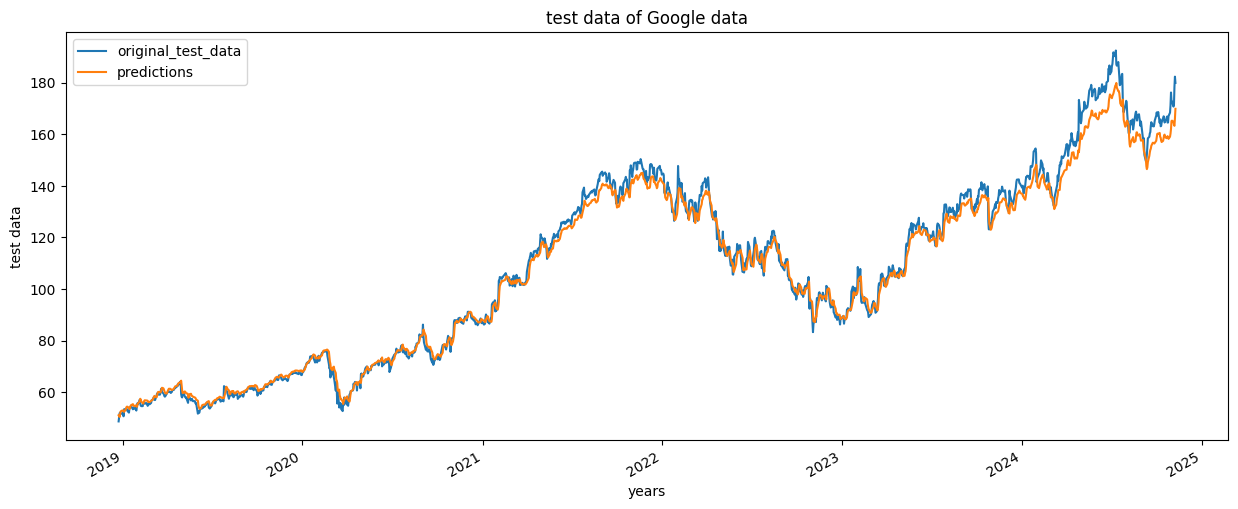

In [45]:
plot_graph((15,6),plotting_data,'test data')

<Figure size 640x480 with 0 Axes>

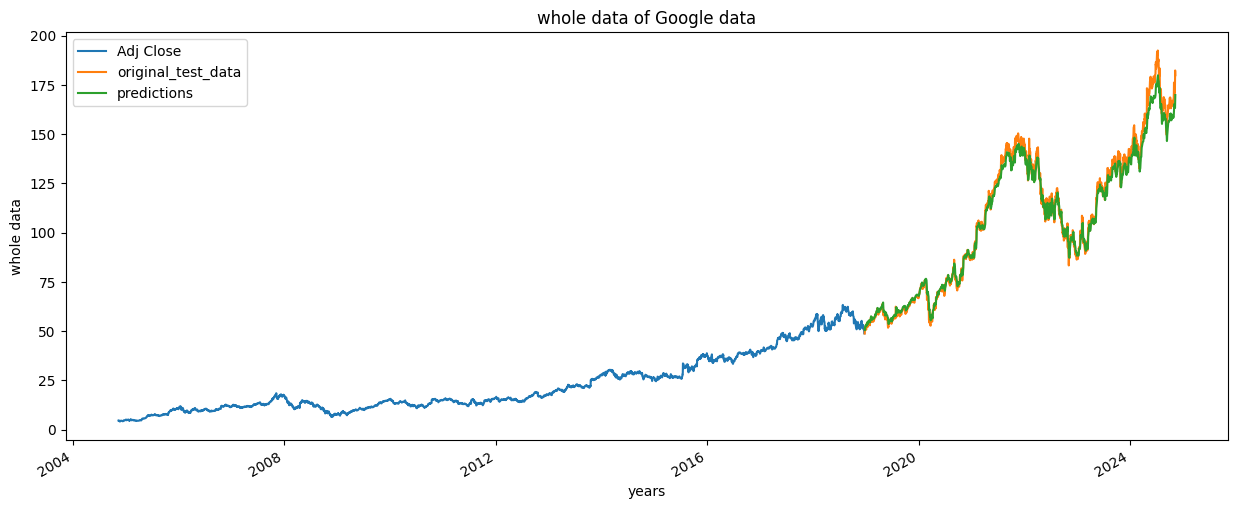

In [46]:
plot_graph((15,6),pd.concat([Adj_close_price[:splitting_len+100],plotting_data],axis=0),'whole data')

In [47]:
model.save("Latest_stock_price_model.keras")